# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\cdoso\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
display(df_hh_income.shape)
display(df_pct_poverty.shape)
display(df_pct_completed_hs.shape)
display(df_share_race_city.shape)
display(df_fatalities.shape)

(29322, 3)

(29329, 3)

(29329, 3)

(29268, 7)

(2535, 14)

In [6]:
display(df_hh_income.columns)
display(df_pct_poverty.columns)
display(df_pct_completed_hs.columns)
display(df_share_race_city.columns)
display(df_fatalities.columns)

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [7]:
display(df_hh_income.isna().values.any())
display(df_pct_poverty.isna().values.any())
display(df_pct_completed_hs.isna().values.any())
display(df_share_race_city.isna().values.any())
display(df_fatalities.isna().values.any())

True

False

False

False

True

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [8]:
# select all rows with NaN under an entire DataFrame:
df_hh_income[df_hh_income.isna().any(axis=1)]
df_fatalities[df_fatalities.isna().any(axis=1)]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
59,110,William Campbell,25/01/15,shot,gun,59.00,M,NaN,Winslow,NJ,False,attack,Not fleeing,False
124,584,Alejandro Salazar,20/02/15,shot,gun,NaN,M,H,Houston,TX,False,attack,Car,False
241,244,John Marcell Allen,30/03/15,shot,gun,54.00,M,NaN,Boulder City,NV,False,attack,Not fleeing,False
266,534,Mark Smith,09/04/15,shot and Tasered,vehicle,54.00,M,NaN,Kellyville,OK,False,attack,Other,False
340,433,Joseph Roy,07/05/15,shot,knife,72.00,M,NaN,Lawrenceville,GA,True,other,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528,2812,Alejandro Alvarado,27/07/17,shot,knife,NaN,M,H,Chowchilla,CA,False,attack,Not fleeing,False
2529,2819,Brian J. Skinner,28/07/17,shot,knife,32.00,M,NaN,Glenville,NY,True,other,Not fleeing,False
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False


In [9]:
df_hh_income  = df_hh_income.dropna()
df_fatalities = df_fatalities.dropna()

In [10]:
# duplicates
print(f'Any duplicates in df_hh_income? {df_hh_income.duplicated().values.any()}')
print(f'Any duplicates in df_pct_poverty? {df_pct_poverty.duplicated().values.any()}')
print(f'Any duplicates in df_pct_completed_hs? {df_pct_completed_hs.duplicated().values.any()}')
print(f'Any duplicates in df_share_race_city? {df_share_race_city.duplicated().values.any()}')
print(f'Any duplicates in df_fatalities? {df_fatalities.duplicated().values.any()}')

Any duplicates in df_hh_income? False
Any duplicates in df_pct_poverty? False
Any duplicates in df_pct_completed_hs? False
Any duplicates in df_share_race_city? False
Any duplicates in df_fatalities? False


In [11]:
# to numeric
df_hh_income["Median Income"] = pd.to_numeric(df_hh_income["Median Income"], errors='coerce')
df_hh_income.dtypes
#df_hh_income.describe()

Geographic Area     object
City                object
Median Income      float64
dtype: object

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [17]:
df_pct_poverty.head()
df_pct_poverty.rename(columns={'Geographic Area': 'State'}, inplace=True)
# to numeric
df_pct_poverty["poverty_rate"] = pd.to_numeric(df_pct_poverty["poverty_rate"], errors='coerce')
df_pct_poverty.dtypes
#df_hh_income.describe()


In [18]:
# group by state
df_states_poverty = df_pct_poverty.groupby(['State'])['poverty_rate'].mean().reset_index()
df_states_poverty.sort_values(by=['poverty_rate'], inplace=True, ascending=False)
df_states_poverty.head()

,State,poverty_rate
25,MS,26.88
3,AZ,25.67
10,GA,23.78
32,NM,23.08
2,AR,22.96


<AxesSubplot:xlabel='State'>

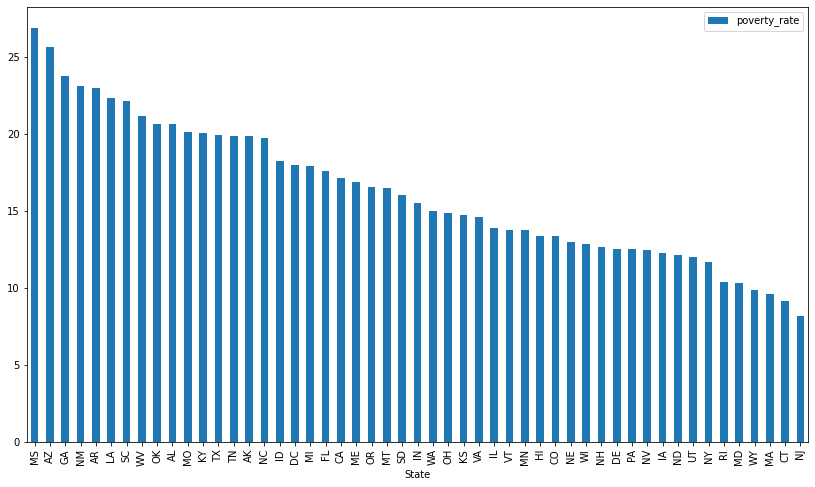

In [19]:
# Plotting using pandas
df_states_poverty.plot.bar(x='State', y='poverty_rate', rot=90, figsize=(14,8))

In [21]:
# using plotly
v_bar = px.bar(
        df_states_poverty,
        x = 'State',
        y = 'poverty_rate',
        color = 'poverty_rate',
        color_continuous_scale='Aggrnyl',
        title='Poverty rate per State')
 
v_bar.update_layout(xaxis_title='State', 
                    coloraxis_showscale=False,
                    yaxis_title='Poverty rate')
v_bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [24]:
df_pct_completed_hs.head()
df_pct_completed_hs.rename(columns={'Geographic Area': 'State'}, inplace=True)

,State,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [29]:
# to numeric
df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(df_pct_completed_hs["percent_completed_hs"], errors='coerce')
df_pct_completed_hs.dtypes
#df_hh_income.describe()

State                    object
City                     object
percent_completed_hs    float64
dtype: object

In [30]:
# group by state
df_state_completed_hs = df_pct_completed_hs.groupby(['State'])['percent_completed_hs'].mean().reset_index()
df_state_completed_hs.sort_values(by=['percent_completed_hs'], inplace=True, ascending=False)
df_state_completed_hs.head()

,State,percent_completed_hs
19,MA,92.40
50,WY,92.10
11,HI,91.67
44,UT,91.62
6,CT,91.59


In [31]:
# using plotly
v_bar_hs = px.bar(
        df_state_completed_hs,
        x = 'State',
        y = 'percent_completed_hs',
        color = 'percent_completed_hs',
        color_continuous_scale='Aggrnyl',
        title='HS Graduation per State')
 
v_bar_hs.update_layout(xaxis_title='State', 
                    coloraxis_showscale=False,
                    yaxis_title='HS Graduation')
v_bar_hs.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [34]:
# merge 2 dataframes
merged_df = pd.merge(df_state_completed_hs, df_states_poverty, on='State', how="inner")
print(f'The dimensions of the DataFrame are: {merged_df.shape}')
merged_df.sort_values('percent_completed_hs', ascending=False)
merged_df.head()

The dimensions of the DataFrame are: (51, 3)


,State,percent_completed_hs,poverty_rate
0,MA,92.40,9.59
1,WY,92.10,9.89
2,HI,91.67,13.40
3,UT,91.62,11.98
4,CT,91.59,9.14


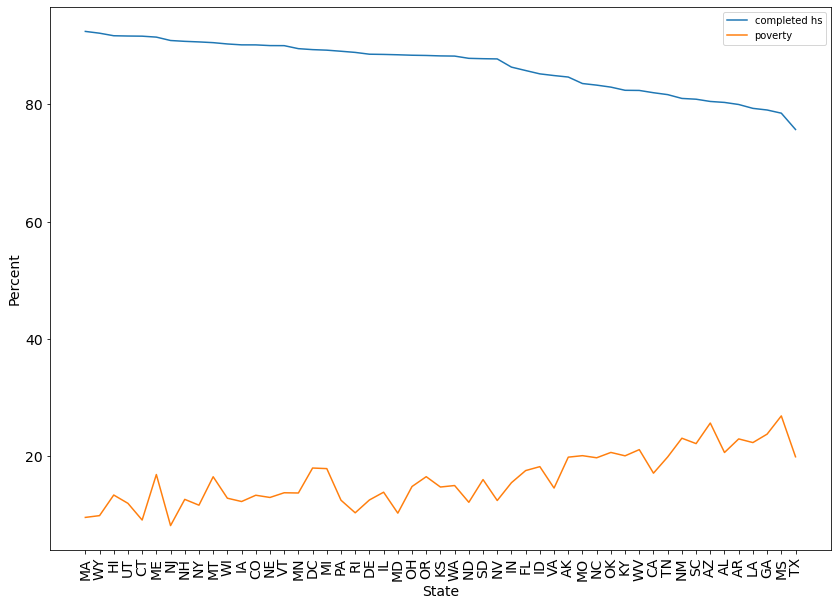

In [41]:
# using matplotlib
plt.figure(figsize=(14,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('State', fontsize=14)
plt.ylabel('Percent', fontsize=14)

#plt.ylim(0, 100)
plt.xticks(rotation = 90)
 
plt.plot(merged_df.State, merged_df.percent_completed_hs, label ='completed hs')
plt.plot(merged_df.State, merged_df.poverty_rate, label ='poverty')
plt.legend()
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).